<a href="https://colab.research.google.com/github/jherna85-pixel/SDS-510/blob/Module-6/Module_6_Project_SNA_Basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#SDS 510: Data Wrangling
##SNA Basics
Jennifer Hernandez

Import Libraries and load in data

In [76]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

set first column as node labels

In [23]:
df = pd.read_csv('NOORDINTOP_COMMUNICATIONS.csv', index_col=0)

Convert dataframe into data for NetworkX


1.   for centrality calculations
2.   and to remove nodes





In [24]:
G = nx.from_pandas_adjacency(df)

Calculate Centrality - Who is the most connected? What node would cause most impact?


1.   Degree- # of direct connections
2.   Betweeness - who is the most common bridge
3.   Eigenvector - connection to other connected nodes



In [ ]:
G_betweenness = nx.betweenness_centrality(G)
G_betweenness

In [56]:
max_betweenness = max(G_betweenness, key=G_betweenness.get)
max_betweenness

'Noordin Mohammed Top'

In [ ]:
G_degree= nx.degree_centrality(G)
G_degree

In [50]:
max_degree = max(G_degree, key=G_degree.get)
max_degree

'Noordin Mohammed Top'

In [ ]:
G_eigenvector = nx.eigenvector_centrality(G)
G_eigenvector

In [53]:
max_eigenvector = max(G_eigenvector, key=G_eigenvector.get)
max_eigenvector

'Noordin Mohammed Top'

When computing centrality, the same node was the highest connected. If this wasn't the case, choose max_betweenness. Remove node from network

In [69]:
weak_node = max_betweenness

Make a copy of the network, and remove the node

In [72]:
G_compare= G.copy()
G_compare.remove_node(weak_node)

Graph the original network without the removel of the most connected node

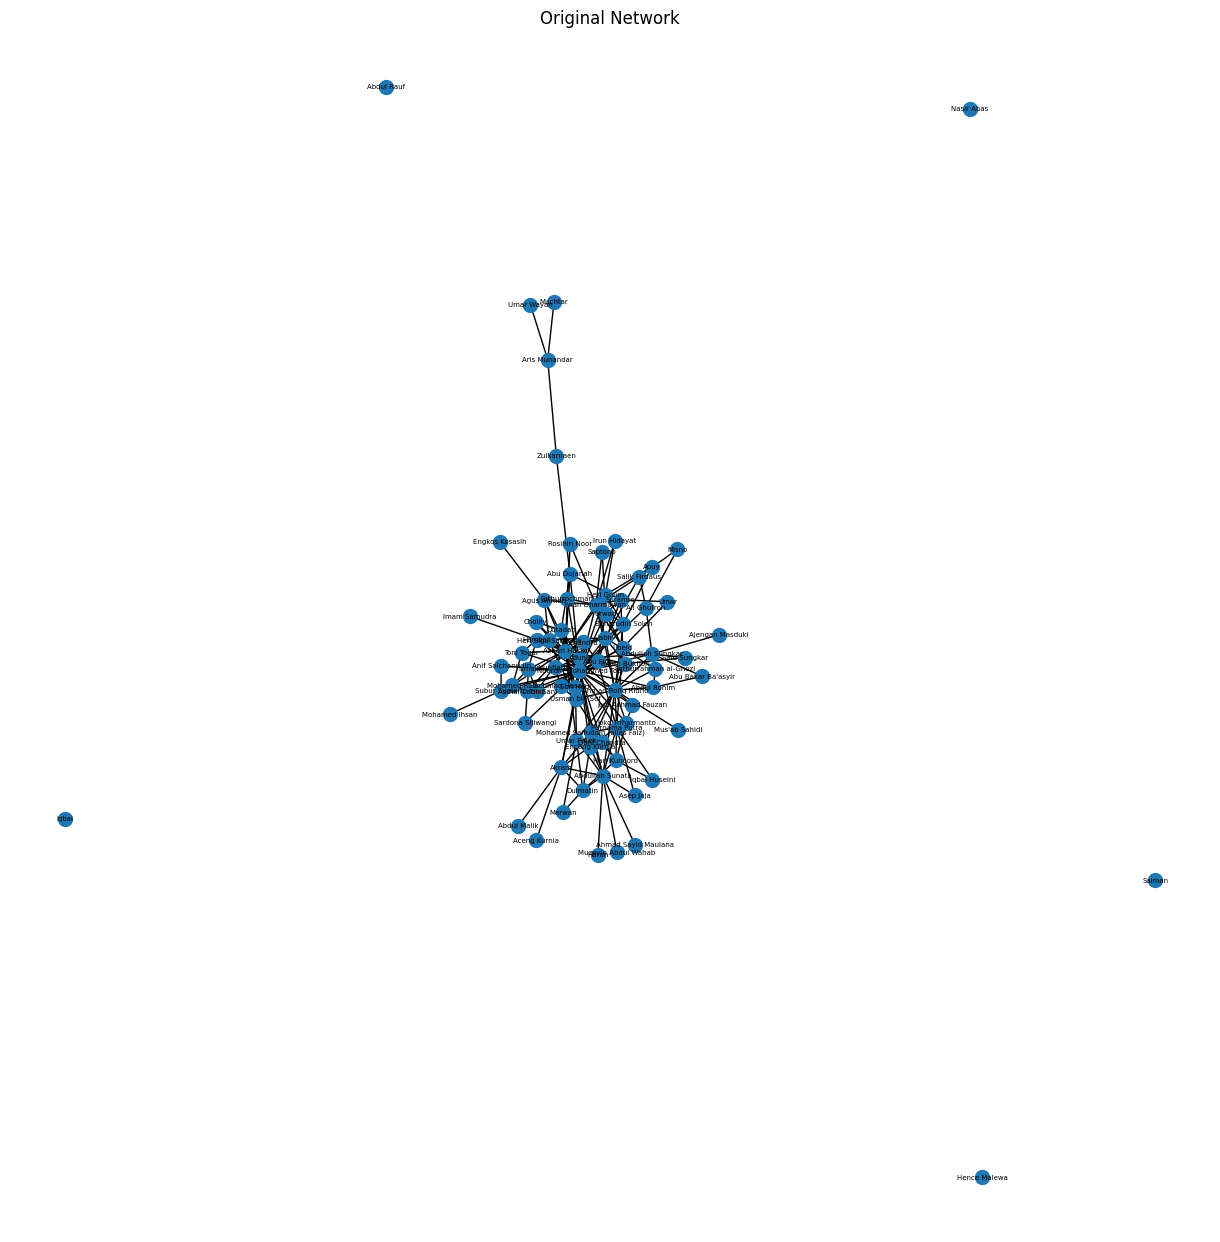

In [67]:
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, seed=7)
nx.draw(G, pos, with_labels=True, node_size=100,font_size=5)
plt.title('Original Network')
plt.show()

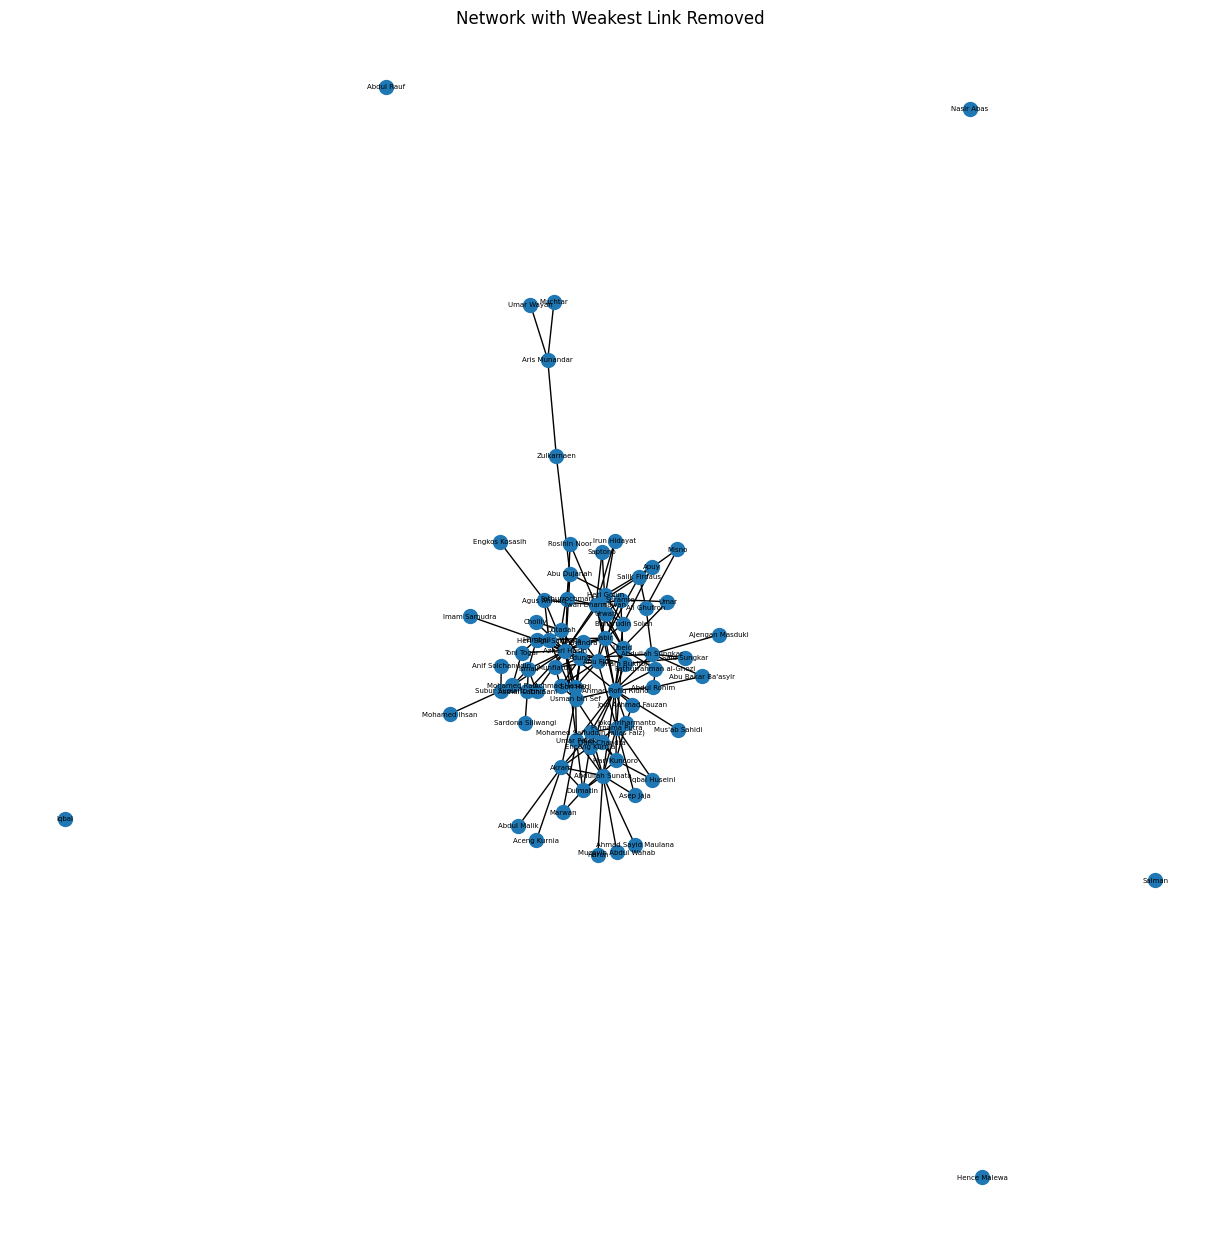

In [90]:
plt.figure(figsize=(12, 12))
nx.draw(G_compare, pos, with_labels=True, node_size=100,font_size=5)
plt.title('Network with Weakest Link Removed')
plt.show()


Compare average centralities OG v. Node_Removal



In [85]:
avg_degree = np.mean(list(G_degree.values()))
avg_betweenness = np.mean(list(G_betweenness.values()))
avg_eigenvector = np.mean(list(G_eigenvector.values()))
print('Average Degree:',avg_degree)
print('Average Betweenness:',avg_betweenness)
print('Average Eigenvector:',avg_eigenvector)

Average Degree: 0.06491398896462185
Average Betweenness: 0.01939410800170294
Average Eigenvector: 0.08045581158175645


Node Removal Centralities- what changed?

In [87]:
G_compare_eigenvector = nx.eigenvector_centrality(G_compare)
G_compare_degree= nx.degree_centrality(G_compare)
G_compare_betweenness = nx.betweenness_centrality(G_compare)

In [89]:
new_avg_degree = np.mean(list(G_compare_degree.values()))
new_avg_betweenness = np.mean(list(G_compare_betweenness.values()))
new_avg_eigenvector = np.mean(list(G_compare_eigenvector.values()))
print('After Node Removel Average Degree:',new_avg_degree)
print('After Node Removel Average Betweenness:',new_avg_betweenness)
print('After Node Removel Average Eigenvector:',new_avg_eigenvector)

After Node Removel Average Degree: 0.05294705294705295
After Node Removel Average Betweenness: 0.022736035893930633
After Node Removel Average Eigenvector: 0.08169405747372233


In this project, the weakest link was identified by calulating centrality scores, betweeness, degress, and eigenvector. By removing the weakest link, Noordin Mohammed Top, this was able to lower the overall connectivity for everyone. But really, when removing this individual, the strength in connection and bridges increased for the other players, so it shifted.